[ 44.5         44.5         44.5        ...,  44.49997864  44.49997864
  44.49997863]


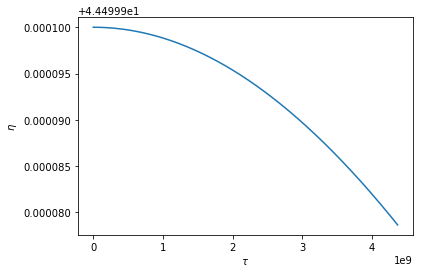

In [69]:
#Part A - 2
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

t = 100
dt = 0.01
N = int(t/dt)
t0 = ((6.955*10**10)/((6.674*10**(-8))*(1.989*10**33)))**0.5

mu_star = 4.5
mu_s = 10**(-5)

tm = np.zeros(N)
eta = np.zeros(N)
d_eta = np.zeros(N)
p = np.zeros(N)

tm[0] = 0
eta[0] = 44.5
d_eta[0] = 0
p[0] = 1.14755 * 10**(-11)

for i in range(1,N):
    d2_eta = -(mu_star/(eta[i-1]**2.0)) + (eta[i-1]**2.0)*p[i-1]/mu_s 
    d_eta[i] = d_eta[i-1] + d2_eta*dt
    eta[i] = eta[i-1] + d_eta[i-1]*dt
    p[i] = p[i-1]*(eta[i-1]**5)/(eta[i]**5)
    tm[i] = tm[i-1]+dt

print(eta)
plt.plot(tm/t0, eta)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\eta$')
plt.show()

C:\Users\Samantha\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in true_divide


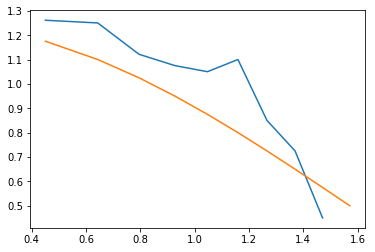

In [39]:
#Part B - 1
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

def Move_Photon(zMax =1, tauMax = 10):


    N = 10**3
    x = np.zeros(N)
    y = np.zeros(N)
    z = np.zeros(N)

    scatters =0

    flag = True

    while flag:

        scatters = 0
        for i in range(N-1):
            chi,xi,nu = np.random.random(3) 

            cosTheta = 1-2*chi
            sinTheta = np.sqrt(1-cosTheta**2)

            phi = 2*np.pi*xi


            tau = -np.log(1 - nu)

            s = tau/tauMax



            x[i+1] = x[i]+ s*sinTheta*np.cos(phi)
            y[i+1] = y[i]+ s*sinTheta*np.sin(phi)
            z[i+1] = z[i]+ s*cosTheta

            if z[i+1] < 0:
                scatters =0
                x = np.zeros(N)
                y = np.zeros(N)
                z = np.zeros(N)
                break

            if z[i+1] > zMax:            
                flag = False
                break
            scatters +=1
            
    return cosTheta, phi, x[scatters],y[scatters]



mu = np.zeros(1000)
y = np.zeros(10)

for i in range(1000):
    mu[i], Phi, Xscat, Yscat = Move_Photon()
    

N_bins = 10

max_x = max(mu) + 0.0001
min_x = min(mu)
binsize = (max_x - min_x)/N_bins

for num in mu: 
    temp = int(num*N_bins)
    y[temp] += 1

bins = np.arange(0,1,1/N_bins)
y = y / (2*bins*1000/10)


plt.plot(np.arccos(bins),y)
plt.plot(np.arccos(bins),(0.5+0.75*bins))
plt.show()

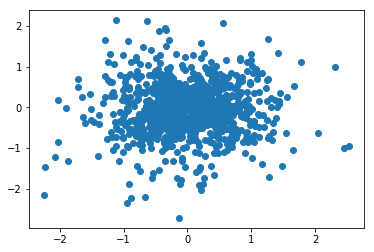

In [34]:
#Part B - 2 
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

def Move_Photon(zMax =1, tauMax = 10):


    N = 10**3
    x = np.zeros(N)
    y = np.zeros(N)
    z = np.zeros(N)

    scatters =0

    flag = True

    while flag:

        scatters = 0
        for i in range(N-1):
            chi,xi,nu = np.random.random(3) 

            cosTheta = 1-2*chi
            sinTheta = np.sqrt(1-cosTheta**2)

            phi = 2*np.pi*xi


            tau = -np.log(1 - nu)

            s = tau/tauMax



            x[i+1] = x[i]+ s*sinTheta*np.cos(phi)
            y[i+1] = y[i]+ s*sinTheta*np.sin(phi)
            z[i+1] = z[i]+ s*cosTheta

            if z[i+1] < 0:
                scatters =0
                x = np.zeros(N)
                y = np.zeros(N)
                z = np.zeros(N)
                break

            if z[i+1] > zMax:            
                flag = False
                break
            scatters +=1
            
    return cosTheta, phi, x[scatters],y[scatters]


Xscat = np.zeros(1000)
Yscat = np.zeros(1000)

for i in range(1000):
    mu, Phi, Xscat[i], Yscat[i] = Move_Photon()
    

N_bins = 10


plt.plot(Xscat,Yscat,'o')
plt.show()